In [66]:
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from scipy import interpolate as interp
import floatpy.readers.padeops_reader as por
import scripts.statistics as stats
import scripts.get_namelist as nml
%matplotlib inline
%config InlineBackend.figure_format = 'png'

fs = 12

def growth_rates(filename_prefix):
    fname = filename_prefix+'growth.dat'
    dat = np.fromfile(fname,dtype=float, count=-1, sep=' ')
    n = np.size(dat)

    nstats=3
    dat = np.reshape(dat,[n/nstats,nstats])
    time = dat[:,0]
    dtheta = dat[:,1]
    domega = dat[:,2]
    return time,dtheta,domega 

In [ ]:
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/256x512x128/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/512x724x256/'
directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr1/1024x1448x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr7/256x512x128/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc02/rr_7/256x512x128/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/512x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr1/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr7/1024x1024x512/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc08/rr_7/1024x1024x512/'

# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/724x724x256/'
# directory = '/projects/ShockInducedMix/ShearLayerData/production/Mc12/rr1/1024x1024x512/'

filename_prefix = directory + '/TKEBudget_'
reader = por.PadeopsReader(filename_prefix, periodic_dimensions=(True,False,True))
x, y, z = reader.readCoordinates()
ymin, ymax = y[0,0,0], y[-1,-1,-1]
Ny = np.shape(y)[1]
inp = nml.inputs(directory,verbose=True)

steps = sorted(reader.steps)
print("Steps: {}".format(steps))

2972.0000000000005


(0, 2.5e-05)

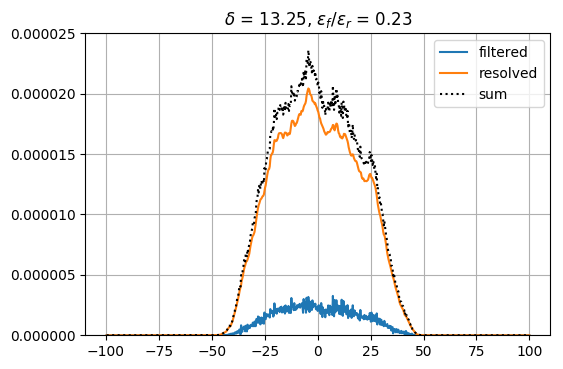

In [64]:
reader.step = 23
print(reader.time)

time,dtheta,domega = growth_rates(directory+'/shearlayer_')
t = reader.time
d = dtheta[np.argmin(abs(time-t))]

diss_num = np.squeeze(reader.readData('dissipation_num'))
diss = np.squeeze(reader.readData('dissipation'))

yplot = y[0,:,0]
plt.figure(dpi=100)
plt.plot(yplot,diss_num,label='filtered')
plt.plot(yplot,diss,label='resolved')
plt.plot(yplot,diss_num+diss,'k:',label='sum')
plt.grid(True)
plt.legend()
idx = range(Ny/4,Ny*3/4)
plt.title(r'$\delta$ = {:.2f}, $\epsilon_f/\epsilon_r$ = {:.2f}'.format(d,max(diss_num[idx]/diss[idx])) )
plt.ylim([0,2.5e-5])

3441.0


Text(0.5,1,'$\\delta$ = 15.34')

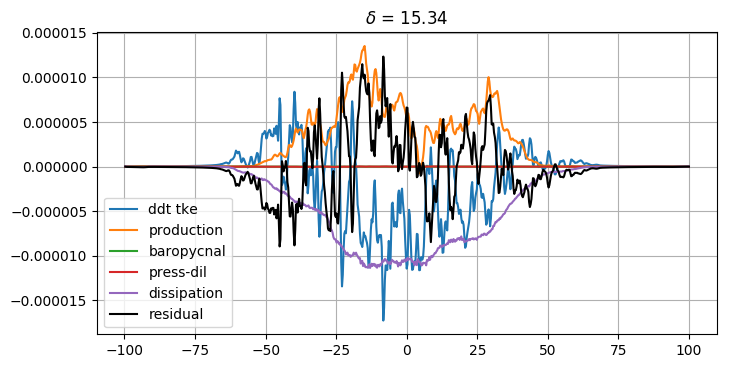

In [85]:
reader.step = 26
print(reader.time)

time,dtheta,domega = growth_rates(directory+'/shearlayer_')
t = reader.time
d = dtheta[np.argmin(abs(time-t))]

plt.figure(figsize=(8,4), dpi=100)
yplot = y[0,:,0]
resid=0
dat = np.squeeze(reader.readData('TKE_rate')); plt.plot(yplot,dat,label='ddt tke'); resid-=dat
dat = np.squeeze(reader.readData('production')); plt.plot(yplot,dat,label='production');resid+=dat
dat = np.squeeze(reader.readData('baropycnal')); plt.plot(yplot,dat,label='baropycnal');resid+=dat
dat = np.squeeze(reader.readData('fluct_p_dil')); plt.plot(yplot,dat,label='press-dil');resid+=dat
dat = np.squeeze(reader.readData('dissipation')); 
dat += np.squeeze(reader.readData('dissipation_num')); plt.plot(yplot,-dat,label='dissipation');resid-=dat
plt.plot(yplot,resid,'k',label='residual')
plt.grid(True)
idx = range(Ny/4,Ny*3/4)
plt.legend()
plt.title(r'$\delta$ = {:.2f}'.format(d)) 
# plt.ylim([0,2.5e-5])